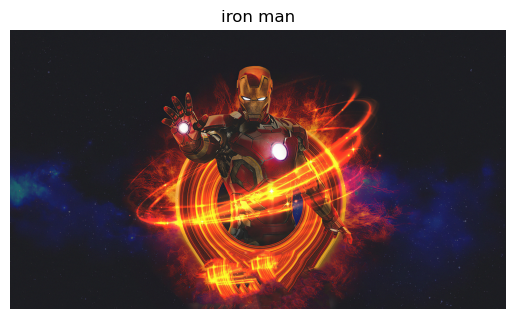

(1080, 1920, 3)

In [1]:
import cv2 as c
import numpy as np
import matplotlib.pyplot as plt
img=c.imread("iron man.jpg")
img_rgb=c.cvtColor(img,c.COLOR_BGR2RGB)
plt.title("iron man")
plt.axis('off')
plt.imshow(img_rgb)
plt.show()
img_rgb.shape

In [2]:
def translation(x,y,img):
    mat=np.array([[1,0,x],
         [0,1,y],
         [0,0,1]])
    h,w,ch=img.shape
    img2=np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            mat2=np.dot(mat,np.array([j,i,1]))
            new_x, new_y = int(mat2[0]), int(mat2[1])
            if 0 <= new_x < w and 0 <= new_y < h:
                img2[new_y, new_x] = img[i, j]
    return img2

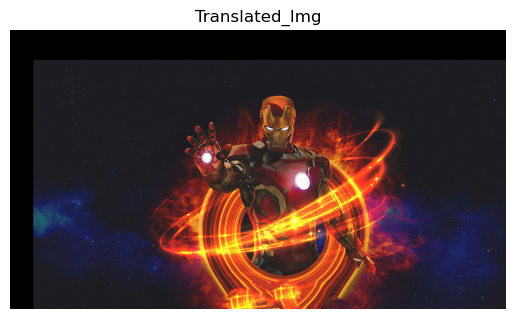

In [3]:
translate=translation(90,115,img_rgb)
plt.imshow(translate)
plt.title("Translated_Img")
plt.axis("off")
plt.show()

In [4]:
def translation2(x, y, img):
    mat = np.array([[1, 0, x],  
                    [0, 1, y],  
                    [0, 0, 1]])  
    h, w, ch = img.shape  
    img2 = np.zeros_like(img) 
    y_indices, x_indices = np.indices((h, w))  
    orig_coords = np.stack([x_indices, y_indices, np.ones_like(x_indices)], axis=-1)  
    orig_coords = orig_coords.reshape(-1, 3).T  
    new_coords = mat @ orig_coords
    new_x, new_y = new_coords[0].astype(int), new_coords[1].astype(int)  
    mask = (0 <= new_x) & (new_x < w) & (0 <= new_y) & (new_y < h)
    orig_x, orig_y = x_indices.flatten()[mask], y_indices.flatten()[mask]
    new_x, new_y = new_x[mask], new_y[mask]
    img2[new_y, new_x] = img[orig_y, orig_x]
    return img2

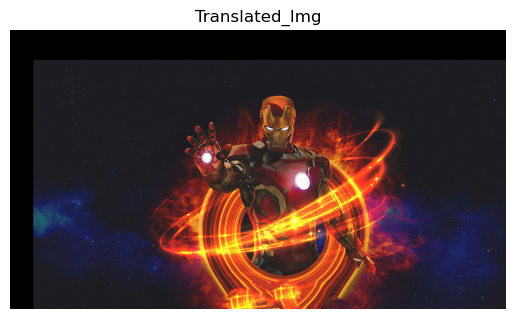

In [5]:
translate2=translation2(90,115,img_rgb)
plt.imshow(translate2)
plt.title("Translated_Img")
plt.axis("off")
plt.show()

In [6]:
def scaling(s1,s2,img):
    mat=np.array([[s1,0,0],
         [0,s2,0],
         [0,0,1]])
    h, w, ch = img.shape  
    new_h, new_w = int(h * s2), int(w * s1)
    img3 = np.zeros((new_h, new_w, ch), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            mat2 = np.dot(mat, np.array([j, i, 1])) 
            new_x, new_y = int(mat2[0]), int(mat2[1])
            if 0 <= new_x < new_w and 0 <= new_y < new_h: 
                img3[new_y, new_x] = img[i, j]
    return img3

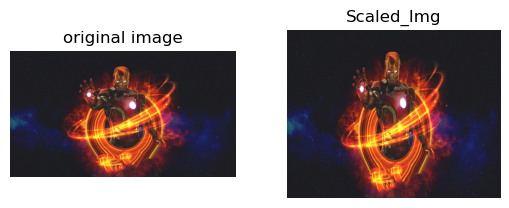

In [7]:
scale=scaling(0.5,0.7,img_rgb)
plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("original image")
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(scale)
plt.title("Scaled_Img")
plt.axis("off")
plt.show()

In [8]:
scale.shape

(756, 960, 3)

In [9]:
def scaling2(s1, s2, img):
    mat = np.array([[s1, 0, 0],  
                    [0, s2, 0],  
                    [0, 0, 1]])  

    h, w, ch = img.shape  
    new_h, new_w = int(h * s2), int(w * s1) 
    img3 = np.zeros((new_h, new_w, ch), dtype=np.uint8) 
    y_indices, x_indices = np.indices((new_h, new_w))  
    orig_coords = np.stack([x_indices / s1, y_indices / s2, np.ones_like(x_indices)], axis=-1)  
    orig_coords = orig_coords.reshape(-1, 3).T  
    orig_x, orig_y = orig_coords[0].astype(int), orig_coords[1].astype(int)  
    mask = (0 <= orig_x) & (orig_x < w) & (0 <= orig_y) & (orig_y < h)
    new_x, new_y = x_indices.flatten()[mask], y_indices.flatten()[mask]
    orig_x, orig_y = orig_x[mask], orig_y[mask]
    img3[new_y, new_x] = img[orig_y, orig_x]
    return img3

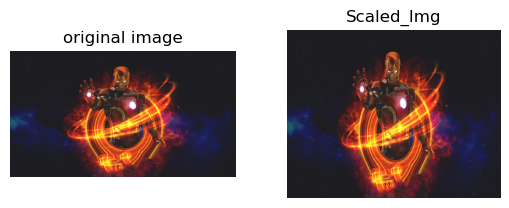

In [10]:
scale2=scaling2(0.5,0.7,img_rgb)
plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("original image")
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(scale2)
plt.title("Scaled_Img")
plt.axis("off")
plt.show()

In [11]:
scale2.shape

(756, 960, 3)

In [12]:
import math as m
def rotation(a,img):
    mat=np.array([[m.cos(a),-m.sin(a),0],
         [m.sin(a),m.cos(a),0],
         [0,0,1]])
    h, w, ch = img.shape 
    cent_x,cent_y=w//2,h//2
    img4 = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            x_shift, y_shift = j - cent_x, i - cent_y
            mat2 = np.dot(mat, np.array([x_shift, y_shift, 1]))  
            new_x, new_y = int(mat2[0]+cent_x), int(mat2[1]+cent_y)
            if 0 <= new_x < w and 0 <= new_y < h:
                img4[new_y, new_x] = img[i, j]  
    return img4

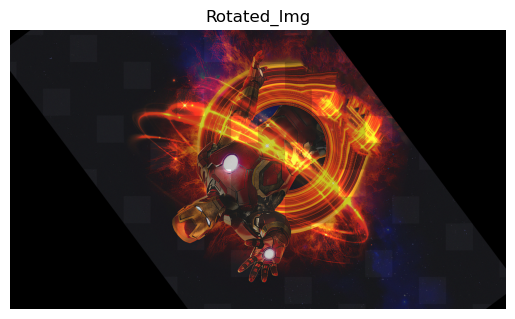

In [13]:
rot=rotation(180,img_rgb)
plt.imshow(rot)
plt.title("Rotated_Img")
plt.axis("off")
plt.show()

In [14]:
def rotation2(a, img):
    h, w, ch = img.shape  
    center_x, center_y = w // 2, h // 2
    mat = np.array([[m.cos(a), -m.sin(a), 0],  
                    [m.sin(a), m.cos(a), 0],  
                    [0, 0, 1]])  
    img4 = np.zeros_like(img)
    y_indices, x_indices = np.indices((h, w))  
    orig_coords = np.stack([x_indices - center_x, y_indices - center_y, np.ones_like(x_indices)], axis=-1)  
    orig_coords = orig_coords.reshape(-1, 3).T  
    new_coords = mat @ orig_coords  
    new_x, new_y = new_coords[0].astype(int) + center_x, new_coords[1].astype(int) + center_y 
    mask = (0 <= new_x) & (new_x < w) & (0 <= new_y) & (new_y < h)
    orig_x, orig_y = x_indices.flatten()[mask], y_indices.flatten()[mask]
    new_x, new_y = new_x[mask], new_y[mask]
    img4[new_y, new_x] = img[orig_y, orig_x]
    return img4

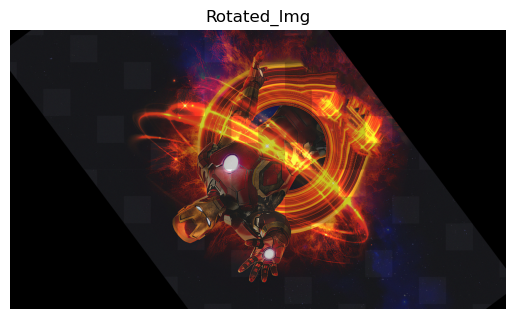

In [15]:
rot2=rotation2(180,img_rgb)
plt.imshow(rot2)
plt.title("Rotated_Img")
plt.axis("off")
plt.show()

In [16]:
def reflect(axis, img):
    h, w, ch = img.shape  
    if axis == 'x':  
        mat = np.array([[1, 0, 0],  
                        [0, -1, h],  
                        [0, 0, 1]])
    elif axis == 'y': 
        mat = np.array([[-1, 0, w],  
                        [0, 1, 0],  
                        [0, 0, 1]])
    img5= np.zeros_like(img) 
    for i in range(h):
        for j in range(w):
            mat2 = np.dot(mat, np.array([j, i, 1]))  
            new_x, new_y = int(mat2[0]), int(mat2[1])
            if 0 <= new_x < w and 0 <= new_y < h:
                img5[new_y, new_x] = img[i, j]
    return img5

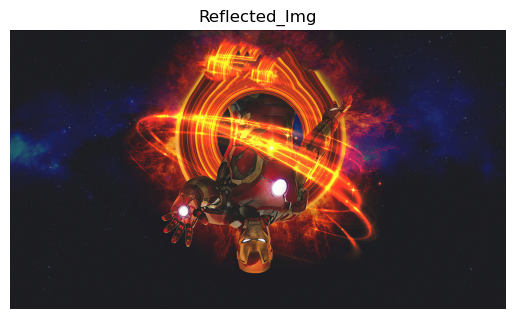

In [17]:
ref_img = reflect('x', img_rgb)  
plt.imshow(ref_img)
plt.title("Reflected_Img")
plt.axis("off")
plt.show()

In [19]:
def reflect2(axis, img):
    h, w, ch = img.shape  
    if axis == 'x': 
        mat = np.array([[1, 0, 0],  
                        [0, -1, h],  
                        [0, 0, 1]])
    elif axis == 'y': 
        mat = np.array([[-1, 0, w],  
                        [0, 1, 0],  
                        [0, 0, 1]])
    img5= np.zeros_like(img)
    y_indices, x_indices = np.indices((h, w))  
    orig_coords = np.stack([x_indices , y_indices, np.ones_like(x_indices)], axis=-1)
    orig_coords = orig_coords.reshape(-1, 3).T  
    new_coords = mat @ orig_coords  
    new_x, new_y = new_coords[0].astype(int) , new_coords[1].astype(int) 
    mask = (0 <= new_x) & (new_x < w) & (0 <= new_y) & (new_y < h)
    orig_x, orig_y = x_indices.flatten()[mask], y_indices.flatten()[mask]
    new_x, new_y = new_x[mask], new_y[mask]
    img5[new_y, new_x] = img[orig_y, orig_x]
    return img5

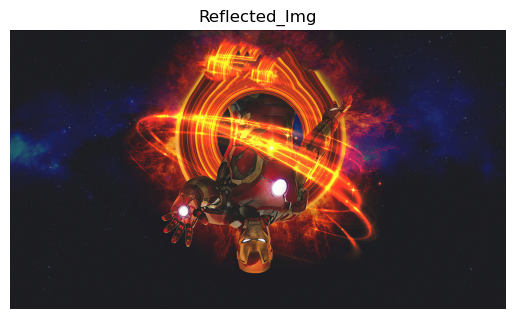

In [21]:
ref_img2= reflect2('x', img_rgb)  
plt.imshow(ref_img2)
plt.title("Reflected_Img")
plt.axis("off")
plt.show()

In [22]:
def shear_img2(axis, factor, img):
    h, w, ch = img.shape  
    if axis == 'x':  
        mat = np.array([[1, factor, 0],  
                        [0, 1, 0],  
                        [0, 0, 1]])
    elif axis == 'y': 
        mat = np.array([[1, 0, 0],  
                        [factor, 1, 0],  
                        [0, 0, 1]])
    img6 = np.zeros_like(img)
    y_indices, x_indices = np.indices((h, w))  
    orig_coords = np.stack([x_indices, y_indices, np.ones_like(x_indices)], axis=-1)
    orig_coords = orig_coords.reshape(-1, 3).T  
    new_coords = mat @ orig_coords  
    new_x, new_y = new_coords[0].astype(int), new_coords[1].astype(int)  
    mask = (0 <= new_x) & (new_x < w) & (0 <= new_y) & (new_y < h)
    orig_x, orig_y = x_indices.flatten()[mask], y_indices.flatten()[mask]
    new_x, new_y = new_x[mask], new_y[mask]
    img6[new_y, new_x] = img[orig_y, orig_x]
    return img6

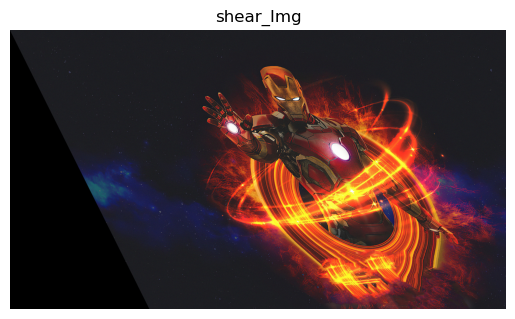

In [23]:
shear2= shear_img2('x',0.5, img_rgb)  
plt.imshow(shear2)
plt.title("shear_Img")
plt.axis("off")
plt.show()

In [24]:
def shear(axis,fact,img):
    h, w, ch = img.shape  
    if axis == 'x':  
        mat = np.array([[1, fact, 0],  
                        [fact, 1, 0],  
                        [0, 0, 1]])
    elif axis == 'y': 
        mat = np.array([[1, 0, 0],  
                        [0, 1, 0],  
                        [0, 0, 1]])
    img6= np.zeros_like(img) 
    for i in range(h):
        for j in range(w):
            mat2 = np.dot(mat, np.array([j, i, 1]))  
            new_x, new_y = int(mat2[0]), int(mat2[1])
            if 0 <= new_x < w and 0 <= new_y < h:
                img6[new_y, new_x] = img[i, j]
    return img6

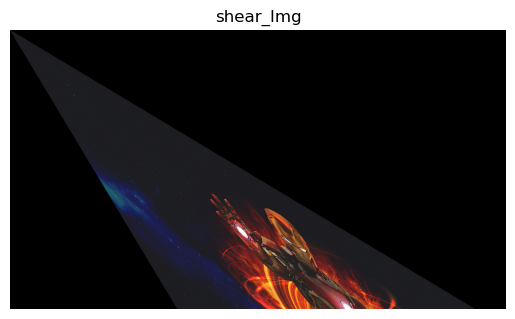

In [25]:
shear= shear('x',0.6, img_rgb)  
plt.imshow(shear)
plt.title("shear_Img")
plt.axis("off")
plt.show()